In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

In [6]:
df = pd.read_csv('SaratogaHouses.csv')

In [7]:
df.head()

,Unnamed: 0,price,lotSize,age,landValue,livingArea,pctCollege,bedrooms,fireplaces,bathrooms,rooms,heating,fuel,sewer,waterfront,newConstruction,centralAir
0,1,132500,0.09,42,50000,906,35,2,1,1.0,5,electric,electric,septic,No,No,No
1,2,181115,0.92,0,22300,1953,51,3,0,2.5,6,hot water/steam,gas,septic,No,No,No
2,3,109000,0.19,133,7300,1944,51,4,1,1.0,8,hot water/steam,gas,public/commercial,No,No,No
3,4,155000,0.41,13,18700,1944,51,3,1,1.5,5,hot air,gas,septic,No,No,No
4,5,86060,0.11,0,15000,840,51,2,0,1.0,3,hot air,gas,public/commercial,No,Yes,Yes


In [8]:
#DATA PREPROCESSING
print(df.isnull().sum())

Unnamed: 0         0
price              0
lotSize            0
age                0
landValue          0
livingArea         0
pctCollege         0
bedrooms           0
fireplaces         0
bathrooms          0
rooms              0
heating            0
fuel               0
sewer              0
waterfront         0
newConstruction    0
centralAir         0
dtype: int64


In [9]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       1728 non-null   int64  
 1   price            1728 non-null   int64  
 2   lotSize          1728 non-null   float64
 3   age              1728 non-null   int64  
 4   landValue        1728 non-null   int64  
 5   livingArea       1728 non-null   int64  
 6   pctCollege       1728 non-null   int64  
 7   bedrooms         1728 non-null   int64  
 8   fireplaces       1728 non-null   int64  
 9   bathrooms        1728 non-null   float64
 10  rooms            1728 non-null   int64  
 11  heating          1728 non-null   object 
 12  fuel             1728 non-null   object 
 13  sewer            1728 non-null   object 
 14  waterfront       1728 non-null   object 
 15  newConstruction  1728 non-null   object 
 16  centralAir       1728 non-null   object 
dtypes: float64(2),

In [10]:
x = df[['lotSize','age','landValue','livingArea','bedrooms','bathrooms']]
y = df['price']

In [11]:
x_train, x_test , y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=42)
#random state is used to get the same output everytime we run the code

In [12]:
model = LinearRegression()

In [13]:
model.fit(x_train,y_train)

LinearRegression()

In [15]:
y_pred = model.predict(x_test)

In [18]:
mae = mean_absolute_error(y_test,y_pred)
print(mae)

#mean absolute error is the average of the absolute differences between predictions and actual values

47135.37799386125


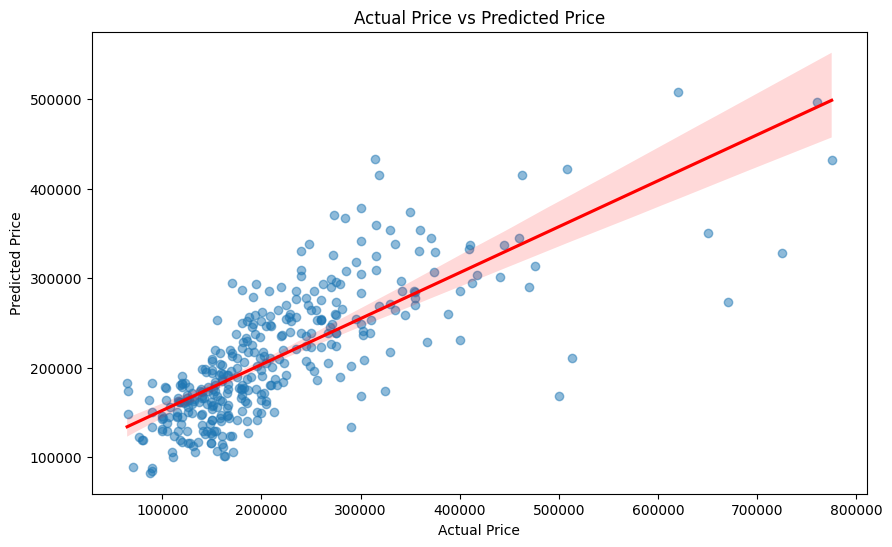

In [19]:
plt.figure(figsize=(10,6))
sns.regplot(x=y_test,y=y_pred,scatter_kws={"alpha":0.5} , line_kws={"color":"red"})
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual Price vs Predicted Price')

plt.show()
